# Proceso de reduccion de dimensiones: PAC 

In [2]:
import pandas as pd
import mglearn
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from mpl_toolkits.mplot3d import axes3d
from sklearn.preprocessing import scale 

%matplotlib inline
plt.style.use('ggplot')

En esta parte vamos a realizar el analisis de componentes principales(PCA) en el conjunto de datos `HTRU2_`

In [3]:
data = pd.read_csv('HTRU2_Features.csv', header = None, 
                   names = ['MeanIntegratedProfile',
                            'StdIntegratedProfile',
                            'ExcessKurtosisIntegratedProfile',
                            'SkewnessIntegratedProfile',
                            'ManDMSNRCurve',
                            'StdDMSNRCurve',
                            'ExcessKurtosisDMSNRCurve',
                            'SkewnessDMSNRCurve',
                            'Clase'])

data.head()

,MeanIntegratedProfile,StdIntegratedProfile,ExcessKurtosisIntegratedProfile,SkewnessIntegratedProfile,ManDMSNRCurve,StdDMSNRCurve,ExcessKurtosisDMSNRCurve,SkewnessDMSNRCurve,Clase
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


Empecemos por dar una rápida mirada al valor medio de cada columna:

In [14]:
pca = PCA(n_components=2)
temp = data.drop(['Clase'], axis='columns')
pca.fit(temp);

In [15]:
transformada=pca.transform(temp)

In [18]:
print(temp.shape)
print(transformada.shape)

(17898, 8)
(17898, 2)


Text(0, 0.5, 'PCA 2')

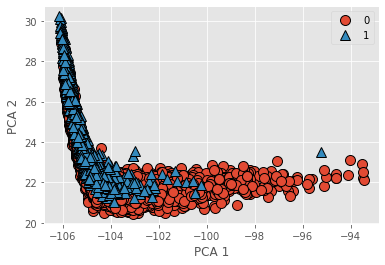

In [53]:
mglearn.discrete_scatter(transformada[:,0],transformada[:,1], data.Clase)
plt.legend(data['Clase'].unique(), loc='best')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

<Figure size 7200x7200 with 0 Axes>

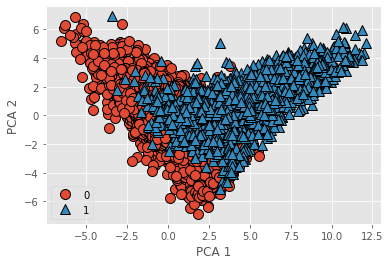

<Figure size 7200x7200 with 0 Axes>

In [60]:
X_norm = scale(temp)
pca.fit(X_norm)
transformada=pca.transform(X_norm)
#escala=MinMaxScaler()
#escala.fit(data);
#escalada=escala.transform(data)
#pca.fit(escalada)
#transformada=pca.transform(data)

mglearn.discrete_scatter(transformada[:,0],transformada[:,1], data.Clase)
plt.legend(data['Clase'].unique(), loc='best')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.figure(figsize=(100,100))

In [23]:
pca_loadings = pca.components_
print(pca_loadings)

[[ 0.03937905  0.00212133 -0.00236016 -0.01304524 -0.10777899 -0.10987241
   0.0391882   0.98643047]
 [-0.49345109 -0.04861403  0.02144651  0.11428225  0.75638128  0.38112997
  -0.03696471  0.14792981]]


In [42]:
len(data.loc[data['Clase']==0])

16259

In [52]:
data['Clase'].unique()

array([0, 1])

In [62]:
explained_variance = pca.explained_variance_
print(explained_variance)

[4.13427769 2.14472493]
